<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Analise_Performance_Loja/blob/main/Analise_Performance_Loja_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
library(readxl)
library(dplyr)
library(ggplot2)

In [7]:
# Definir a opção para evitar notação científica
options(scipen = 999)

In [8]:
# Leitura dos dados
dados <- read_xlsx ("/dados.xlsx")
print(dados)

# A tibble: 2,926 × 4
   Loja    Ano Mes     Venda
   <chr> <dbl> <chr>   <dbl>
 1 1      2018 jan   299245.
 2 1      2018 fev   305991.
 3 1      2018 mar   329688.
 4 1      2018 abr   371206.
 5 1      2018 mai   325520.
 6 1      2018 jun   408801.
 7 1      2018 jul   411977.
 8 1      2018 ago   345155.
 9 1      2018 set   352072.
10 1      2018 out   371522.
# ℹ 2,916 more rows


In [16]:
# Calculando a média de vendas por loja e ano:

media_vendas <- dados %>%
  group_by(Loja, Ano) %>%
  summarize(Media_Venda = mean(Venda, na.rm = TRUE))
print(media_vendas)

`summarise()` has grouped output by 'Loja'. You can override using the
`.groups` argument.


# A tibble: 250 × 3
# Groups:   Loja [127]
   Loja    Ano Media_Venda
   <chr> <dbl>       <dbl>
 1 1      2018     375247.
 2 1      2019     389394.
 3 10     2018     366391.
 4 10     2019     371003.
 5 100    2018     447377.
 6 100    2019     464979.
 7 101    2018     424419.
 8 101    2019     481535.
 9 102    2018     377225.
10 102    2019     403068.
# ℹ 240 more rows


In [18]:
# Media de vendas em ordem decrescente para obter as 5 maiores médias
maiores_medias <- media_vendas %>%
  arrange(desc(Media_Venda)) %>%
  head(5)
# Média de vendas em ordem crescente para obter as 5 menores médias
menores_medias <- media_vendas %>%
  arrange(Media_Venda) %>%
  head(5)

In [19]:
# Criando uma tabela com as 5 maiores médias e as 5 menores médias
tabela_maiores_e_menores_medias <- rbind(maiores_medias, menores_medias)

print(tabela_maiores_e_menores_medias)

# A tibble: 10 × 3
# Groups:   Loja [7]
   Loja    Ano Media_Venda
   <chr> <dbl>       <dbl>
 1 11     2019    1668628.
 2 11     2018    1531852.
 3 30     2019    1402808.
 4 30     2018    1400070.
 5 43     2019    1371419.
 6 506    2018       6572.
 7 74     2019     148751.
 8 74     2018     149667.
 9 126    2019     158965.
10 6      2019     159473.


In [21]:
# Calculando o total de vendas por mês e ano:

total_vendas_por_mes <- dados %>%
  group_by(Ano, Mes) %>%
  summarize(Total_Venda = sum(Venda, na.rm = TRUE))
print(total_vendas_por_mes)

`summarise()` has grouped output by 'Ano'. You can override using the `.groups`
argument.


# A tibble: 24 × 3
# Groups:   Ano [2]
     Ano Mes   Total_Venda
   <dbl> <chr>       <dbl>
 1  2018 abr     45718812.
 2  2018 ago     52839897.
 3  2018 dez    116140909.
 4  2018 fev     35077044.
 5  2018 jan     37937854.
 6  2018 jul     51740056.
 7  2018 jun     53769380.
 8  2018 mai     53586064.
 9  2018 mar     43852141.
10  2018 nov     57945021.
# ℹ 14 more rows


In [22]:
# Definir a opção para evitar notação científica
options(scipen = 999)

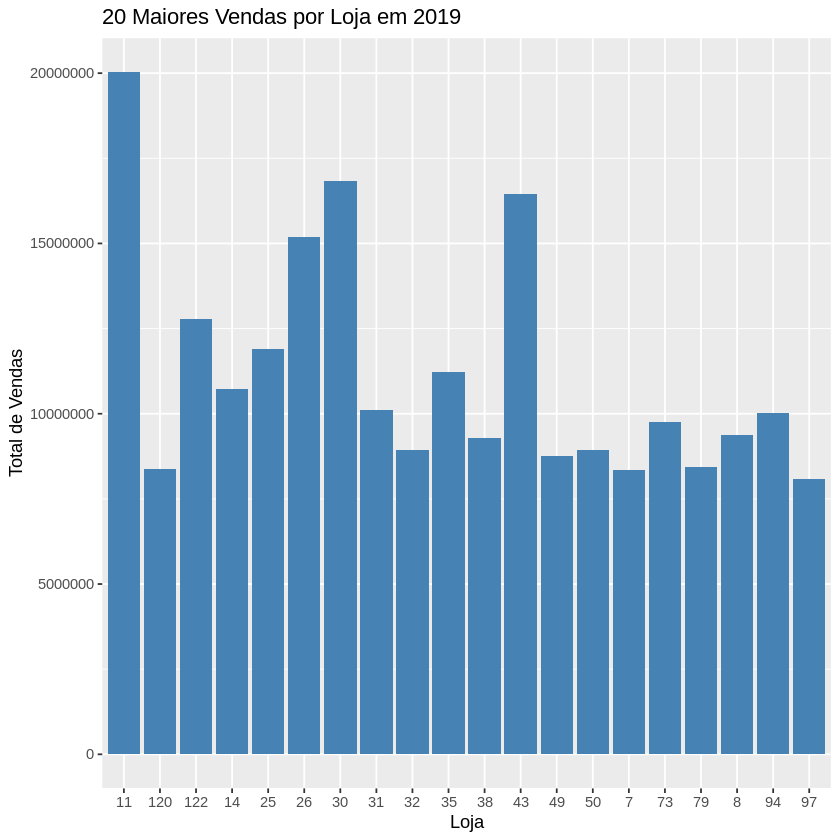

In [23]:
# Filtrar apenas os dados de 2019
vendas_2019 <- filter(dados, Ano == 2019)

# Calcular o total de vendas por loja em 2019
vendas_por_loja_2019 <- vendas_2019 %>%
  group_by(Loja) %>%
  summarize(Total_Venda = sum(Venda)) %>%
  arrange(desc(Total_Venda)) %>%
  head(20)

# Criar o gráfico de barras com as 20 maiores vendas por loja em 2019
ggplot(vendas_por_loja_2019, aes(x = factor(Loja), y = Total_Venda)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "20 Maiores Vendas por Loja em 2019", x = "Loja", y = "Total de Vendas")

# 1. Loja com melhor crescimento no Ano de 2019, em percentual de crescimento sobre ano anterior

*Aproveitei e calculei as lojas com menor crescimento*

In [24]:
# Filtrando os dados apenas para os anos de 2018 e 2019
dados_2018_2019 <- filter(dados, Ano %in% c(2018, 2019))

# Calcular o total de vendas para cada loja em 2018 e 2019
vendas_por_loja_2018 <- dados_2018_2019 %>%
  filter(Ano == 2018) %>%
  group_by(Loja) %>%
  summarize(Total_Venda_2018 = sum(Venda))

vendas_por_loja_2019 <- dados_2018_2019 %>%
  filter(Ano == 2019) %>%
  group_by(Loja) %>%
  summarize(Total_Venda_2019 = sum(Venda))

In [25]:
# Juntando os totais de vendas de 2018 e 2019 em um único dataframe
crescimento_por_loja <- left_join(vendas_por_loja_2019, vendas_por_loja_2018, by = "Loja")

# Calculando o percentual de crescimento entre 2018 e 2019 para cada loja
crescimento_por_loja <- crescimento_por_loja %>%
  mutate(Percentual_Crescimento = (Total_Venda_2019 - Total_Venda_2018) / Total_Venda_2018 * 100)



In [26]:
# Ordenando as lojas pelo percentual de crescimento em 2019
crescimento_por_loja <- crescimento_por_loja %>%
  arrange(desc(Percentual_Crescimento))

In [27]:
# Tabela com as 20 primeiras lojas de maior crescimento em 2019 comparado a 2018
tabela_melhores_lojas <- head(crescimento_por_loja, 20)
print(tabela_melhores_lojas)

# A tibble: 20 × 4
   Loja  Total_Venda_2019 Total_Venda_2018 Percentual_Crescimento
   <chr>            <dbl>            <dbl>                  <dbl>
 1 506           3149044.            6572.               47813.  
 2 141           6667934.         1966740.                 239.  
 3 136           3667945.         1085896.                 238.  
 4 140           5434691.         1961619.                 177.  
 5 139           4628846.         2191948.                 111.  
 6 107           3304020.         2514088.                  31.4 
 7 63            2588557.         2138800.                  21.0 
 8 64            5898779.         5026502.                  17.4 
 9 129           4572697.         3972967.                  15.1 
10 79            8440358.         7381929.                  14.3 
11 35           11226160.         9877111.                  13.7 
12 101           5778417.         5093031.                  13.5 
13 44            2890072.         2561451.               

In [28]:
# Ordenando as lojas pelo pior crescimento percentual em 2019 comparado a 2019
crescimento_por_loja <- crescimento_por_loja %>%
  arrange(Percentual_Crescimento)

# Mostrando a tabela com as 20 primeiras lojas de maior crescimento em 2019
tabela_melhores_lojas <- head(crescimento_por_loja, 20)
print(tabela_melhores_lojas)

# A tibble: 20 × 4
   Loja  Total_Venda_2019 Total_Venda_2018 Percentual_Crescimento
   <chr>            <dbl>            <dbl>                  <dbl>
 1 3             4026902.         5217404.                 -22.8 
 2 5             2823487.         3404184.                 -17.1 
 3 28            4426060.         5216176.                 -15.1 
 4 61            6008997.         7044964.                 -14.7 
 5 27            3563767.         4092827.                 -12.9 
 6 92            2466341.         2832466.                 -12.9 
 7 84            3352178.         3841990.                 -12.7 
 8 39            6802496.         7783564.                 -12.6 
 9 71            3285748.         3749345.                 -12.4 
10 85            2945563.         3331567.                 -11.6 
11 125           3134712.         3540015.                 -11.4 
12 86            4143045.         4667869.                 -11.2 
13 12            4730458.         5287322.               

# 2.Loja com melhor crescimento no 1º e 2º semestre de 2019, em percentual de crescimento sobre ano anterior;

In [29]:
# Separando os dados por semestre (1º e 2º semestre de 2019)
crescimento_por_loja_semestre <- crescimento_por_loja %>%
  mutate(Semestre = ifelse(substr(Loja, 1, 1) < "5", "1º Semestre", "2º Semestre"))

In [30]:
# Calculando o percentual de crescimento por loja em cada semestre
crescimento_por_loja_semestre <- crescimento_por_loja_semestre %>%
  group_by(Loja, Semestre) %>%
  summarize(Percentual_Crescimento_Semestre = mean(Percentual_Crescimento))

`summarise()` has grouped output by 'Loja'. You can override using the
`.groups` argument.


In [31]:
# Encontrar a loja com o melhor crescimento em cada semestre
melhor_crescimento_por_semestre <- crescimento_por_loja_semestre %>%
  group_by(Semestre) %>%
  top_n(1, wt = Percentual_Crescimento_Semestre)

# Mostrar a tabela com a loja de melhor crescimento em cada semestre
print(melhor_crescimento_por_semestre)

# A tibble: 2 × 3
# Groups:   Semestre [2]
  Loja  Semestre    Percentual_Crescimento_Semestre
  <chr> <chr>                                 <dbl>
1 141   1º Semestre                            239.
2 506   2º Semestre                          47813.


# 3.Ranking das melhores lojas em percentual de crescimento de Dezembro 2019  (classificar da MELHOR PARA PIOR em % Crescimento sobre AA).

In [32]:
# Filtrando os dados apenas para o mês de dezembro de 2019
dados_dez_2019 <- filter(dados, Ano == 2019, Mes == "dez")

# Calculando o total de vendas para cada loja em dezembro de 2019 e em 2018
vendas_por_loja_dez_2019 <- dados_dez_2019 %>%
  group_by(Loja) %>%
  summarize(Total_Venda_dez_2019 = sum(Venda))

vendas_por_loja_2018 <- filter(dados, Ano == 2018) %>%
  group_by(Loja) %>%
  summarize(Total_Venda_2018 = sum(Venda))

In [33]:
# Juntando os totais de vendas de dezembro de 2019 e de 2018 em um único dataframe
crescimento_dez_2019 <- left_join(vendas_por_loja_dez_2019, vendas_por_loja_2018, by = "Loja")

# Calculando o percentual de crescimento de dezembro de 2019 em relação a 2018 para cada loja
crescimento_dez_2019 <- crescimento_dez_2019 %>%
  mutate(Percentual_Crescimento = (Total_Venda_dez_2019 - Total_Venda_2018) / Total_Venda_2018 * 100)

In [34]:
# filtrando apenas as lojas com percentual de crescimento positivo
ranking_positivo_melhores_lojas_dez_2019 <- crescimento_dez_2019 %>%
  filter(Percentual_Crescimento > 0) %>%
  arrange(desc(Percentual_Crescimento))

In [35]:
# Mostrando o ranking das melhores lojas em percentual de crescimento de dezembro de 2019
print(ranking_positivo_melhores_lojas_dez_2019)

# A tibble: 1 × 4
  Loja  Total_Venda_dez_2019 Total_Venda_2018 Percentual_Crescimento
  <chr>                <dbl>            <dbl>                  <dbl>
1 506                642544.            6572.                  9676.


In [36]:
# Ordenando as lojas pelo percentual de crescimento de dezembro de 2019
ranking_geral_melhores_lojas_dez_2019 <- crescimento_dez_2019 %>%
  arrange(desc(Percentual_Crescimento))
# Mostrar o ranking das melhores lojas em percentual de crescimento de dezembro de 2019
print(ranking_geral_melhores_lojas_dez_2019)

# A tibble: 127 × 4
   Loja  Total_Venda_dez_2019 Total_Venda_2018 Percentual_Crescimento
   <chr>                <dbl>            <dbl>                  <dbl>
 1 506                642544.            6572.                 9676. 
 2 141               1638075.         1966740.                  -16.7
 3 136                718612.         1085896.                  -33.8
 4 140                931177.         1961619.                  -52.5
 5 139                799390.         2191948.                  -63.5
 6 138               1725059.         6069576.                  -71.6
 7 1                 1202593.         4502960.                  -73.3
 8 122               3010380.        11552476.                  -73.9
 9 63                 554858.         2138800.                  -74.1
10 135               1437992.         5862070.                  -75.5
# ℹ 117 more rows
